In [1]:
# Import python libraries for project goals
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency

C:\Users\UDAY\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load dataset
mental_health = pd.read_csv('Mental-Health-Dataset.csv')
# See first and last five rows
mental_health

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


## Data Information 
Some immediate insights are:

1.There are 17 columns and 292364 rows overall.
2.The name and datatype of each column - most values are objects in this dataset.
3.Column names can be changed for consistency and facilitating the analysis.
4.Column Timestamp can be dropped as it is not needed for the analysis, and simply illustrates the time of data input
5.There are 2313 duplicates and 5202 null values in the dataset

In [3]:
# Check data for null values and datatypes
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
# Display descriptive analysis of the dataset
mental_health.describe().T

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [5]:
# Check DataFrame for duplicates
mental_health.duplicated().sum()

2313

In [6]:
# Check number of null values in the DataFrame
mental_health.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

## Data Cleaning

In [7]:
# Drop duplicates
mental_health.drop_duplicates(inplace=True)
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290051 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                290051 non-null  object
 1   Gender                   290051 non-null  object
 2   Country                  290051 non-null  object
 3   Occupation               290051 non-null  object
 4   self_employed            284858 non-null  object
 5   family_history           290051 non-null  object
 6   treatment                290051 non-null  object
 7   Days_Indoors             290051 non-null  object
 8   Growing_Stress           290051 non-null  object
 9   Changes_Habits           290051 non-null  object
 10  Mental_Health_History    290051 non-null  object
 11  Mood_Swings              290051 non-null  object
 12  Coping_Struggles         290051 non-null  object
 13  Work_Interest            290051 non-null  object
 14  Social_Weakness     

In [8]:
# Drop 'Timestamp'
mental_health = mental_health.drop(['Timestamp'], axis=1)

In [9]:
# Fill null values with most common values
mental_health['self_employed'] = mental_health['self_employed'].fillna(mental_health['self_employed'].mode()[0])
mental_health

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [10]:
# Renaming columns to a consistent format
mental_health.columns = mental_health.columns.str.lower().str.replace(' ', '_')
# Display cleaned dataset info
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290051 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   gender                   290051 non-null  object
 1   country                  290051 non-null  object
 2   occupation               290051 non-null  object
 3   self_employed            290051 non-null  object
 4   family_history           290051 non-null  object
 5   treatment                290051 non-null  object
 6   days_indoors             290051 non-null  object
 7   growing_stress           290051 non-null  object
 8   changes_habits           290051 non-null  object
 9   mental_health_history    290051 non-null  object
 10  mood_swings              290051 non-null  object
 11  coping_struggles         290051 non-null  object
 12  work_interest            290051 non-null  object
 13  social_weakness          290051 non-null  object
 14  mental_health_interv

## Exploratory Data Analysis

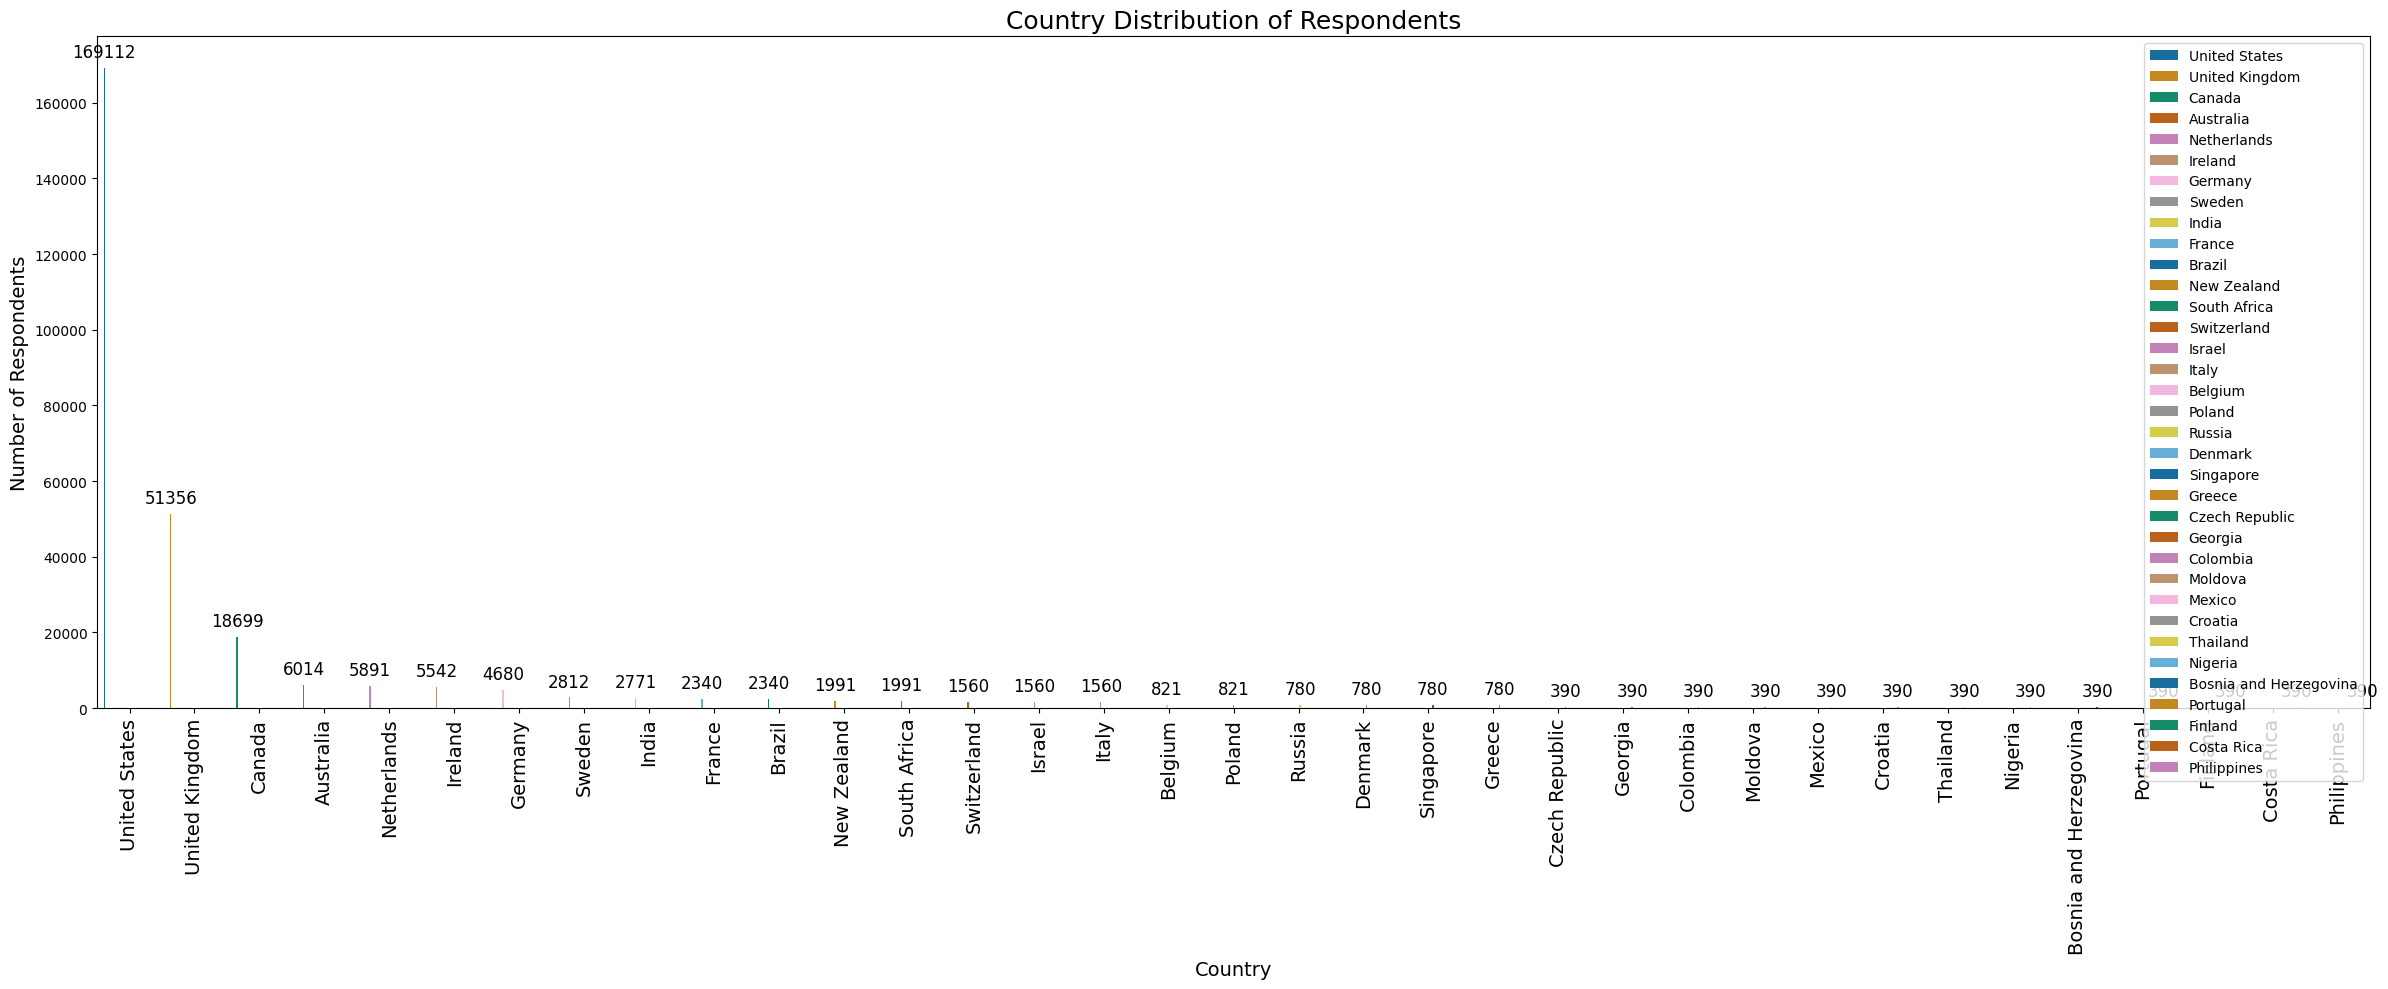

In [11]:
# Count the occurrences of each country
country_counts = mental_health['country'].value_counts()

# Plot the bar chart with a compact layout
plt.figure(figsize=(24, 10))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue = country_counts.index, palette="colorblind")

# Add value counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5, fontsize=12)

# Add title and labels
plt.title('Country Distribution of Respondents', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=14)
plt.legend(loc='upper right')

# Reduce space around the plot
plt.tight_layout()

# Show the plot
plt.show()

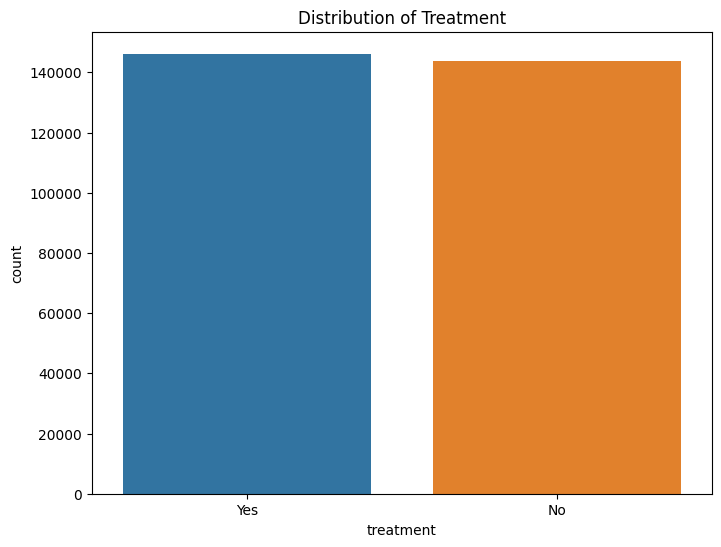

In [14]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='treatment', data=mental_health)  # Assuming 'treatment' is now treatment_Yes after one-hot encoding
plt.title("Distribution of Treatment")
plt.show()

## Standardization

In [ ]:
import pandas as pd

# Standardize all columns related to mental health
columns_to_normalize = [
    'gender', 'country', 'occupation', 'self_employed', 'family_history',
    'treatment', 'days_indoors', 'growing_stress', 'changes_habits',
    'mental_health_history', 'mood_swings', 'coping_struggles',
    'work_interest', 'social_weakness', 'mental_health_interview', 'care_options'
]

# Standardize text data
for column in columns_to_normalize:
    mental_health[column] = mental_health[column].str.strip().str.lower()

# Map categorical values to numeric values where applicable
binary_mapping = {'yes': 1, 'no': 0, 'unknown': -1}
for column in columns_to_normalize:
    # Example: Apply mapping to binary columns
    if mental_health[column].nunique() <= 3:  # Assuming binary or ternary categories
        mental_health[column] = mental_health[column].map(binary_mapping).fillna(-1)  # Replace unknowns with -1

In [23]:
mental_health

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
0,-1.0,united states,corporate,0,0,1,1-14 days,1.0,0.0,1.0,-1.0,0,0.0,1.0,0.0,-1.0
1,-1.0,united states,corporate,0,1,1,1-14 days,1.0,0.0,1.0,-1.0,0,0.0,1.0,0.0,0.0
2,-1.0,united states,corporate,0,1,1,1-14 days,1.0,0.0,1.0,-1.0,0,0.0,1.0,0.0,1.0
3,-1.0,united states,corporate,0,1,1,1-14 days,1.0,0.0,1.0,-1.0,0,0.0,1.0,-1.0,1.0
4,-1.0,united states,corporate,0,1,1,1-14 days,1.0,0.0,1.0,-1.0,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,-1.0,united states,business,1,1,1,15-30 days,0.0,-1.0,0.0,-1.0,1,0.0,-1.0,-1.0,-1.0
292360,-1.0,south africa,business,0,1,1,15-30 days,0.0,-1.0,0.0,-1.0,1,0.0,-1.0,0.0,1.0
292361,-1.0,united states,business,0,1,0,15-30 days,0.0,-1.0,0.0,-1.0,1,0.0,-1.0,0.0,0.0
292362,-1.0,united states,business,0,1,1,15-30 days,0.0,-1.0,0.0,-1.0,1,0.0,-1.0,0.0,1.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [25]:
columns_to_encode = [
    'gender', 'country', 'occupation', 'self_employed', 'family_history',
    'treatment', 'days_indoors', 'growing_stress', 'changes_habits',
    'mental_health_history', 'mood_swings', 'coping_struggles',
    'work_interest', 'social_weakness', 'mental_health_interview', 'care_options'
]

# Encoding categorical data
label_encoder = LabelEncoder()
for column in columns_to_encode:
    mental_health[column] = label_encoder.fit_transform(mental_health[column])

In [26]:
# Splitting features and target
X = mental_health.drop('treatment', axis=1)  # Assuming 'treatment' is the target column
y = mental_health['treatment']

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the data (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [30]:
# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [31]:
rf_predictions

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [32]:
lr_predictions

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [33]:
# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     28872
           1       0.71      0.75      0.73     29139

    accuracy                           0.72     58011
   macro avg       0.72      0.72      0.72     58011
weighted avg       0.72      0.72      0.72     58011

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     28872
           1       0.71      0.70      0.70     29139

    accuracy                           0.70     58011
   macro avg       0.70      0.70      0.70     58011
weighted avg       0.70      0.70      0.70     58011



In [34]:
# Accuracy comparison
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")

Random Forest Accuracy: 0.7201737601489373
Logistic Regression Accuracy: 0.7035217458757822


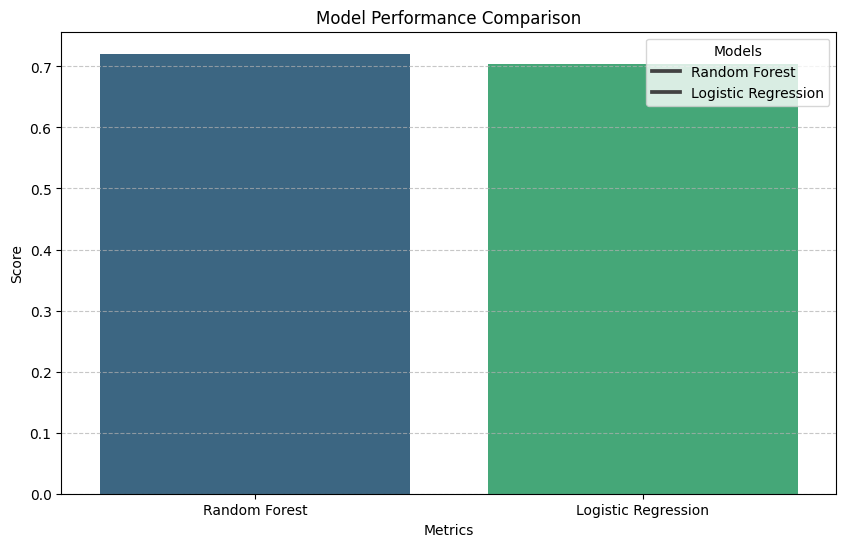

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    "Accuracy": [rf_accuracy, lr_accuracy],
    "Precision": [
        precision_score(y_test, rf_predictions, average='weighted'),
        precision_score(y_test, lr_predictions, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, rf_predictions, average='weighted'),
        recall_score(y_test, lr_predictions, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, rf_predictions, average='weighted'),
        f1_score(y_test, lr_predictions, average='weighted')
    ]
}


import pandas as pd
metrics_df = pd.DataFrame(metrics, index=["Random Forest", "Logistic Regression"])

# Plot comparison chart
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.T, palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.legend(title="Models", labels=["Random Forest", "Logistic Regression"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## CLI - Interface

In [39]:
import numpy as np


print("Enter your responses for the following questions (1 for Yes, 0 for No):")

gender = int(input("Enter gender (1=Male, 0=Female): "))  # Example encoding; replace with dataset-specific encoding
country = int(input("Enter country (numerical code; refer to your dataset mapping): "))
occupation = int(input("Enter occupation (numerical code; refer to your dataset mapping): "))
self_employed = int(input("Are you self-employed? (1=Yes, 0=No): "))
family_history = int(input("Do you have a family history of mental illness? (1=Yes, 0=No): "))
days_indoors = int(input("Do you spend significant time indoors? (1=Yes, 0=No): "))
growing_stress = int(input("Have you experienced growing stress? (1=Yes, 0=No): "))
changes_habits = int(input("Have you noticed changes in your habits? (1=Yes, 0=No): "))
mental_health_history = int(input("Do you have a history of mental health issues? (1=Yes, 0=No): "))
mood_swings = int(input("Do you experience mood swings? (1=Yes, 0=No): "))
coping_struggles = int(input("Do you struggle to cope with daily tasks? (1=Yes, 0=No): "))
work_interest = int(input("Are you losing interest in your work? (1=Yes, 0=No): "))
social_weakness = int(input("Do you feel socially weak or isolated? (1=Yes, 0=No): "))
mental_health_interview = int(input("Have you discussed mental health in any professional interview? (1=Yes, 0=No): "))
care_options = int(input("Are you aware of available mental health care options? (1=Yes, 0=No): "))

# Combine all inputs into a single array
user_input = np.array([
    gender, country, occupation, self_employed, family_history,
    days_indoors, growing_stress, changes_habits, mental_health_history,
    mood_swings, coping_struggles, work_interest, social_weakness,
    mental_health_interview, care_options
]).reshape(1, -1)

# Make prediction
prediction = rf_model.predict(user_input)
prediction_proba = rf_model.predict_proba(user_input)

# Display the results
print("\nPredicted Mental Health Condition:", label_encoder.inverse_transform(prediction)[0])
print("Prediction Confidence (Probabilities):", prediction_proba)


Enter your responses for the following questions (1 for Yes, 0 for No):
Enter gender (1=Male, 0=Female): 1
Enter country (numerical code; refer to your dataset mapping): 1
Enter occupation (numerical code; refer to your dataset mapping): 1
Are you self-employed? (1=Yes, 0=No): 1
Do you have a family history of mental illness? (1=Yes, 0=No): 1
Do you spend significant time indoors? (1=Yes, 0=No): 1
Have you experienced growing stress? (1=Yes, 0=No): 1
Have you noticed changes in your habits? (1=Yes, 0=No): 1
Do you have a history of mental health issues? (1=Yes, 0=No): 1
Do you experience mood swings? (1=Yes, 0=No): 1
Do you struggle to cope with daily tasks? (1=Yes, 0=No): 1
Are you losing interest in your work? (1=Yes, 0=No): 1
Do you feel socially weak or isolated? (1=Yes, 0=No): 1
Have you discussed mental health in any professional interview? (1=Yes, 0=No): 1
Are you aware of available mental health care options? (1=Yes, 0=No): 1

Predicted Mental Health Condition: -1.0
Prediction 

C:\Users\UDAY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\UDAY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
